# Visualization

## Housekeeping

In [25]:
# Set working directory
import os
import re

try:
  from google.colab import drive
  drive.mount('/content/drive')
  os.chdir('/content/drive/MyDrive/ds1_nhanes/')
except:
  from pathlib import Path
  if not re.search(r'ds1_nhanes$', str(os.getcwd())):
    os.chdir(Path(os.getcwd()).parent)

print(os.getcwd())

c:\Users\d1033\Documents\git_repos\ds1_nhanes


In [26]:
# Load other packages
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# Load dataset
df = pd.read_csv('data/clean/df_nhanes_2017_2023.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19386 entries, 0 to 19385
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 19386 non-null  int64  
 1   SEQN                       19386 non-null  int64  
 2   weight_2d                  19386 non-null  float64
 3   grams                      19386 non-null  float64
 4   f_total_(cup_eq)           19386 non-null  float64
 5   f_citmlb_(cup_eq)          19386 non-null  float64
 6   f_other_(cup_eq)           19386 non-null  float64
 7   f_juice_(cup_eq)           19386 non-null  float64
 8   v_total_(cup_eq)           19386 non-null  float64
 9   v_drkgr_(cup_eq)           19386 non-null  float64
 10  v_redor_total_(cup_eq)     19386 non-null  float64
 11  v_redor_tomato_(cup_eq)    19386 non-null  float64
 12  v_redor_other_(cup_eq)     19386 non-null  float64
 13  v_starchy_total_(cup_eq)   19386 non-null  flo

## PBP Consumption

Set a common theme for our plots:

In [28]:
sns.set_theme(
    style="ticks",
    rc= {
      "axes.spines.right": False,
      "axes.spines.top": False,
      "figure.figsize": (6, 6)
    }
  )

PBP consumption by gender. Note that we are using the 2-day weights

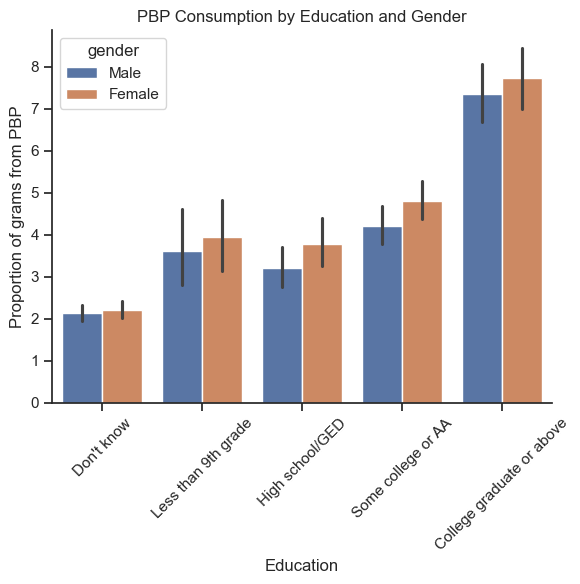

In [29]:
# pbp consumption by gender
ax = sns.barplot(
  data=df,
  y='grams_from_pbp',
  x='education',
  hue='gender',
  order=[
    "Don't know",
    'Less than 9th grade',
    'High school/GED',
    'Some college or AA',
    'College graduate or above'
  ],
  weights='weight_2d',
  errorbar=('ci', 95)
)
ax.set(
  ylabel = 'Proportion of grams from PBP',
  xlabel = 'Education',
  title = 'PBP Consumption by Education and Gender'
)
plt.xticks(rotation=45)

# Save plot
plt.tight_layout()
plt.savefig('outputs/checkin_1/pbp_consumption_by_education.png')

plt.show()
# Would like to adjust names horizontally to line up better after rotation, hjust arg?

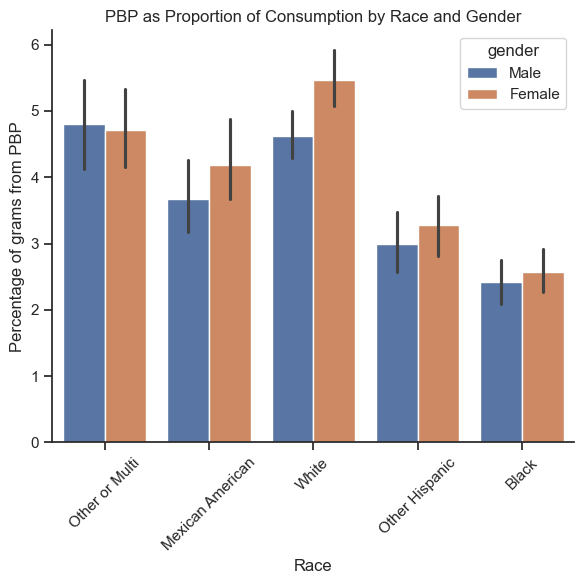

In [30]:
# pbp consumption by race
ax = sns.barplot(
  data=df,
  y='grams_from_pbp',
  x='race',
  hue='gender',
  weights='weight_2d',
  errorbar=('ci', 95)
)
ax.set(
  xlabel = 'Race',
  ylabel = 'Percentage of grams from PBP',
  title = 'PBP as Proportion of Consumption by Race and Gender'
)
plt.xticks(rotation=45)
plt.tight_layout()

# Save it
plt.savefig('outputs/checkin_1/pbp_consumption_by_race.png')

# Show it
plt.show()

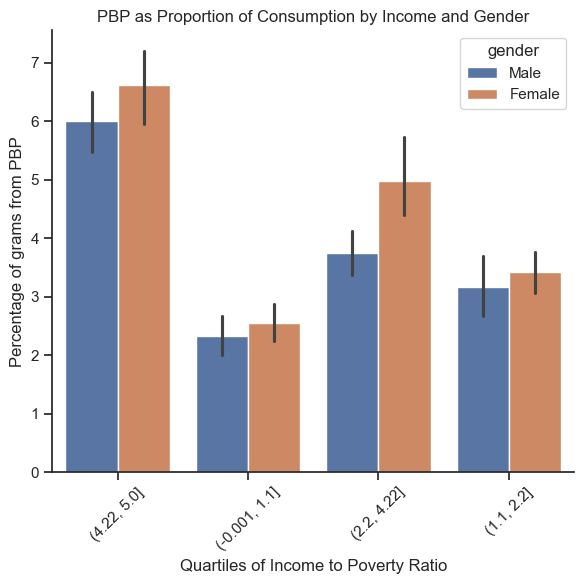

In [31]:
# pbp consumption by poverty ratio
ax = sns.barplot(
  data = df,
  y='grams_from_pbp',
  x='income_ratio_qs',
  hue='gender',
  weights='weight_2d',
  errorbar=('ci', 95)
)
ax.set(
  xlabel = 'Quartiles of Income to Poverty Ratio',
  ylabel = 'Percentage of grams from PBP',
  title = 'PBP as Proportion of Consumption by Income and Gender'
)
plt.xticks(rotation=45)
plt.tight_layout()

# Save it
plt.savefig('outputs/checkin_1/pbp_consumption_by_income.png')

# Show it
plt.show()

## Test a Table

Just figuring out how to make a LaTeX table

In [32]:
# Make a smaller DF to play around with
small_df = df[['weight_2d', 'grams', 'gender', 'grams_from_pbp']].head()
print(small_df)

   weight_2d    grams  gender  grams_from_pbp
0    8904.03  2827.75    Male            1.99
1    3626.88  4177.01  Female            0.52
2   17806.00  4081.76    Male            0.04
3    2994.10  9866.51  Female            1.10
4    9115.96  1906.30    Male            0.00


In [33]:
# Rename columns to ditch underscores
small_df.columns = ['2 Day Weight', 'Total Grams Over 2 Days', 'Gender', 'Total PBP Grams']
print(small_df)

   2 Day Weight  Total Grams Over 2 Days  Gender  Total PBP Grams
0       8904.03                  2827.75    Male             1.99
1       3626.88                  4177.01  Female             0.52
2      17806.00                  4081.76    Male             0.04
3       2994.10                  9866.51  Female             1.10
4       9115.96                  1906.30    Male             0.00


In [34]:
small_df.to_latex(
  'outputs/checkin_1/test_table.tex',
  index=False,
  float_format="%.2f",
  label='test_table',
  caption='This is a test table',
  position='h'
)
